In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet.csv to ObesityDataSet.csv


In [4]:
# Load the dataset
df = pd.read_csv('ObesityDataSet.csv')

In [5]:
# --- 1. Exploratory Data Analysis (EDA) ---
print("=== Exploratory Data Analysis ===")

=== Exploratory Data Analysis ===


In [6]:
# Displaying the first few rows of the dataset
print("\n1.1 Displaying the first 5 rows of the dataset:")
print(df.head())



1.1 Displaying the first 5 rows of the dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_We

In [7]:
# Displaying general information about the dataset
print("\n1.2 Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types and Non-Null Counts:")
print(df.info())


1.2 Dataset Information:
Number of rows: 2111
Number of columns: 17

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family

In [8]:
# Descriptive statistics
print("\n1.3 Descriptive Statistics:")
print(df.describe(include='all'))


1.3 Descriptive Statistics:
         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572        

In [9]:
# Checking for missing values
print("\n1.4 Checking for Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


1.4 Checking for Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
dtype: int64


In [10]:
# Checking for unique values in each column
print("\n1.5 Unique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


1.5 Unique Values in Each Column:
Age: 1394 unique values
Gender: 3 unique values
Height: 1562 unique values
Weight: 1518 unique values
CALC: 5 unique values
FAVC: 3 unique values
FCVC: 808 unique values
NCP: 637 unique values
SCC: 3 unique values
SMOKE: 3 unique values
CH2O: 1263 unique values
family_history_with_overweight: 3 unique values
FAF: 1186 unique values
TUE: 1130 unique values
CAEC: 5 unique values
MTRANS: 6 unique values
NObeyesdad: 7 unique values


In [11]:
# Checking for duplicate rows
print("\n1.6 Checking for Duplicates:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


1.6 Checking for Duplicates:
Number of duplicate rows: 18


In [12]:
# Checking class balance in the target variable (NObeyesdad)
print("\n1.7 Class Distribution in Target Variable (NObeyesdad):")
print(df['NObeyesdad'].value_counts(normalize=True))



1.7 Class Distribution in Target Variable (NObeyesdad):
NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64


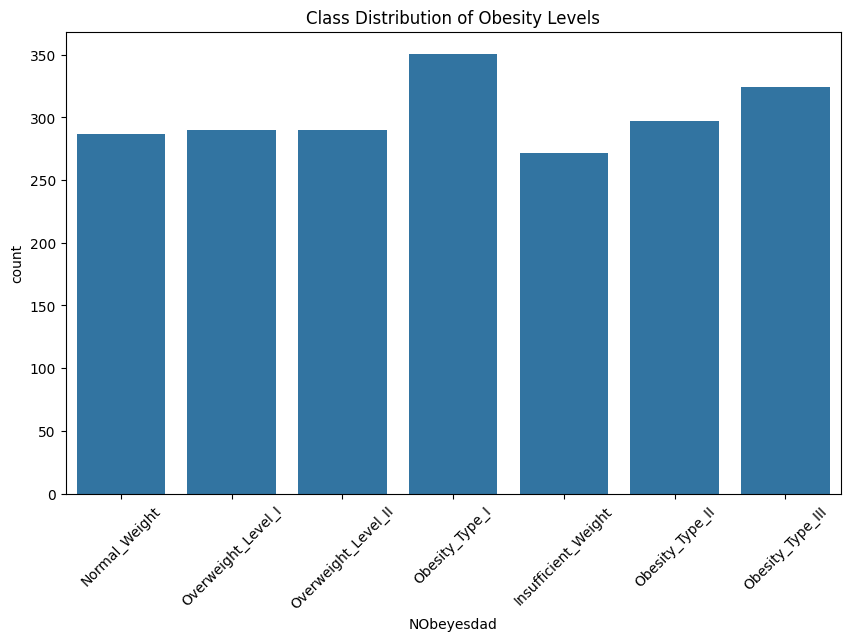

In [13]:
# Visualizing class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Class Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.show()

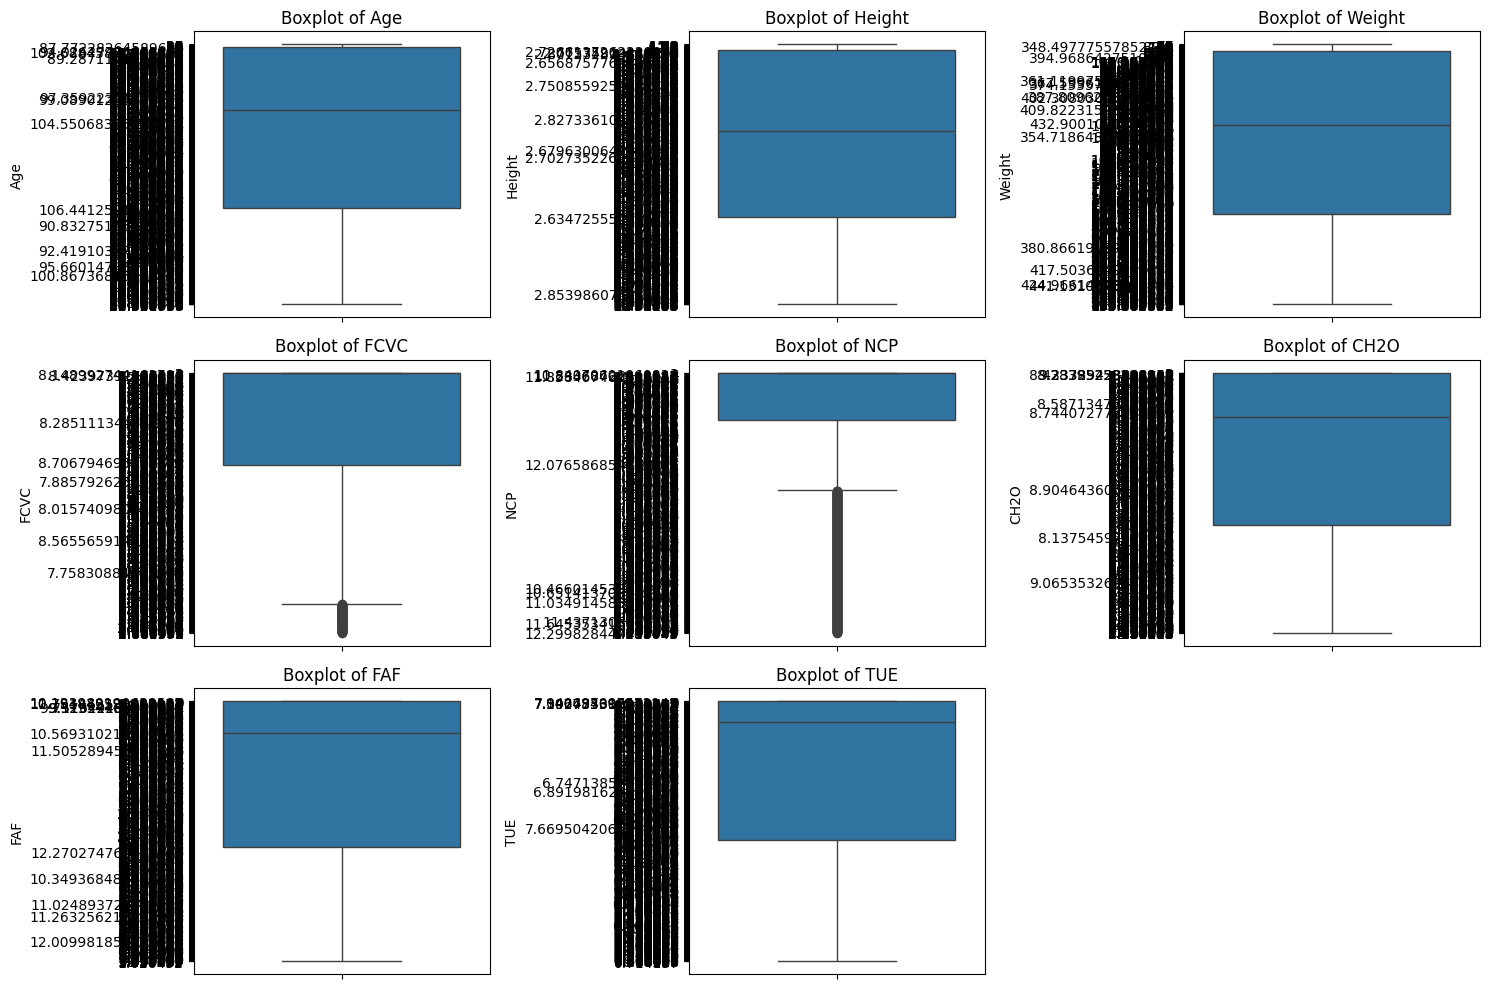

In [14]:
# Detecting outliers using boxplots for numerical columns
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [15]:
# EDA Conclusion
print("\n1.8 EDA Conclusion:")
print("""
- The dataset contains 2111 rows and 17 columns, with a mix of numerical and categorical features.
- Missing values are present in several columns, indicated by '?' or empty entries.
- Some numerical columns (e.g., Weight, Age) show outliers, with extreme values like Weight > 300.
- The target variable 'NObeyesdad' has 7 classes, with some imbalance (e.g., Obesity_Type_III is more frequent).
- Duplicate rows exist, which need to be addressed.
- Visualizations suggest relationships between features like Weight and obesity levels, but further preprocessing is needed.
""")


1.8 EDA Conclusion:

- The dataset contains 2111 rows and 17 columns, with a mix of numerical and categorical features.
- Missing values are present in several columns, indicated by '?' or empty entries.
- Some numerical columns (e.g., Weight, Age) show outliers, with extreme values like Weight > 300.
- The target variable 'NObeyesdad' has 7 classes, with some imbalance (e.g., Obesity_Type_III is more frequent).
- Duplicate rows exist, which need to be addressed.
- Visualizations suggest relationships between features like Weight and obesity levels, but further preprocessing is needed.



In [16]:
# --- 2. Preprocessing Data ---
print("\n=== Preprocessing Data ===")


=== Preprocessing Data ===


In [17]:
# Replacing '?' with NaN for consistency
df.replace('?', np.nan, inplace=True)

In [18]:
# Handling missing values
print("\n2.1 Handling Missing Values:")
# For numerical columns, impute with median
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)


2.1 Handling Missing Values:


In [19]:
# For categorical columns, impute with mode
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [20]:
# Verify no missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [21]:
# Handling duplicates
print("\n2.2 Handling Duplicates:")
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df.shape[0]}")


2.2 Handling Duplicates:
Number of rows after removing duplicates: 2091


In [22]:
# Handling outliers using IQR method
print("\n2.3 Handling Outliers:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


2.3 Handling Outliers:


In [23]:
# Encoding categorical variables
print("\n2.4 Encoding Categorical Variables:")
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


2.4 Encoding Categorical Variables:


In [24]:
# Encoding target variable
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])

In [25]:
# Feature selection: Dropping less relevant features based on domain knowledge
# MTRANS (transportation mode) may have low predictive power
df = df.drop(['MTRANS'], axis=1)

In [26]:
# Splitting features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [27]:
# Handling class imbalance using SMOTE
print("\n2.5 Handling Class Imbalance with SMOTE:")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f"Shape of resampled dataset: {X_resampled.shape}")


2.5 Handling Class Imbalance with SMOTE:
Shape of resampled dataset: (2457, 15)


In [28]:
# Standardizing numerical features
print("\n2.6 Standardizing Numerical Features:")
scaler = StandardScaler()
X_resampled[numerical_cols] = scaler.fit_transform(X_resampled[numerical_cols])


2.6 Standardizing Numerical Features:


In [29]:
# Preprocessing Conclusion
print("\n2.7 Preprocessing Conclusion:")
print("""
- Missing values were imputed (numerical with median, categorical with mode).
- Duplicates were removed, reducing dataset size slightly.
- Outliers in numerical columns were clipped using the IQR method.
- Categorical variables were encoded to numerical values using LabelEncoder.
- MTRANS was dropped due to low predictive relevance.
- Class imbalance was addressed using SMOTE, balancing the target classes.
- Numerical features were standardized for better model performance.
""")


2.7 Preprocessing Conclusion:

- Missing values were imputed (numerical with median, categorical with mode).
- Duplicates were removed, reducing dataset size slightly.
- Outliers in numerical columns were clipped using the IQR method.
- Categorical variables were encoded to numerical values using LabelEncoder.
- MTRANS was dropped due to low predictive relevance.
- Class imbalance was addressed using SMOTE, balancing the target classes.
- Numerical features were standardized for better model performance.



In [30]:
# --- 3. Modeling and Evaluation ---
print("\n=== Modeling and Evaluation ===")


=== Modeling and Evaluation ===


In [31]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [32]:
# Initializing models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

In [33]:
# Dictionary to store evaluation metrics
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


3.1 Training and Evaluating Models:

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        71
           1       0.82      0.57      0.67        70
           2       0.87      0.85      0.86        68
           3       0.86      0.97      0.91        69
           4       0.97      0.96      0.97        72
           5       0.71      0.77      0.74        65
           6       0.74      0.75      0.75        77

    accuracy                           0.83       492
   macro avg       0.83      0.83      0.82       492
weighted avg       0.83      0.83      0.82       492



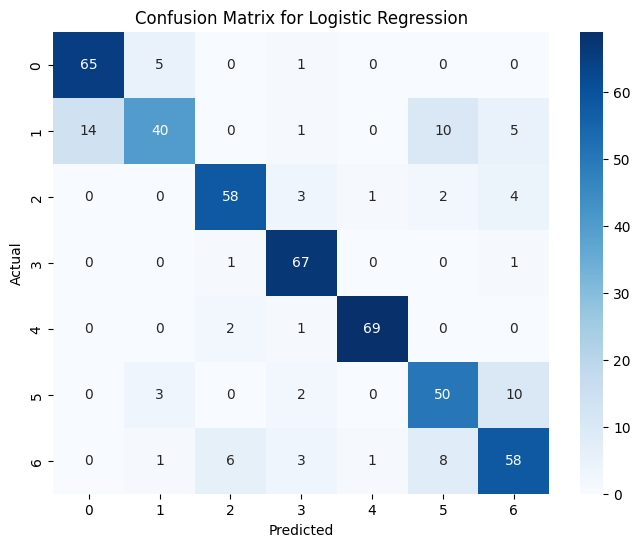


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        71
           1       0.84      0.97      0.90        70
           2       0.97      0.97      0.97        68
           3       0.99      0.97      0.98        69
           4       0.97      1.00      0.99        72
           5       0.95      0.85      0.89        65
           6       0.95      0.91      0.93        77

    accuracy                           0.95       492
   macro avg       0.95      0.95      0.95       492
weighted avg       0.95      0.95      0.95       492



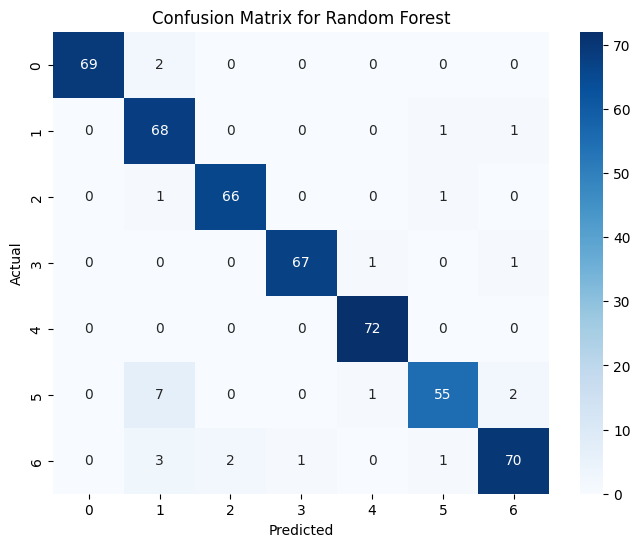


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        71
           1       0.78      0.70      0.74        70
           2       0.90      0.91      0.91        68
           3       0.93      0.99      0.96        69
           4       0.95      0.97      0.96        72
           5       0.77      0.86      0.81        65
           6       0.94      0.82      0.88        77

    accuracy                           0.88       492
   macro avg       0.88      0.88      0.88       492
weighted avg       0.88      0.88      0.88       492



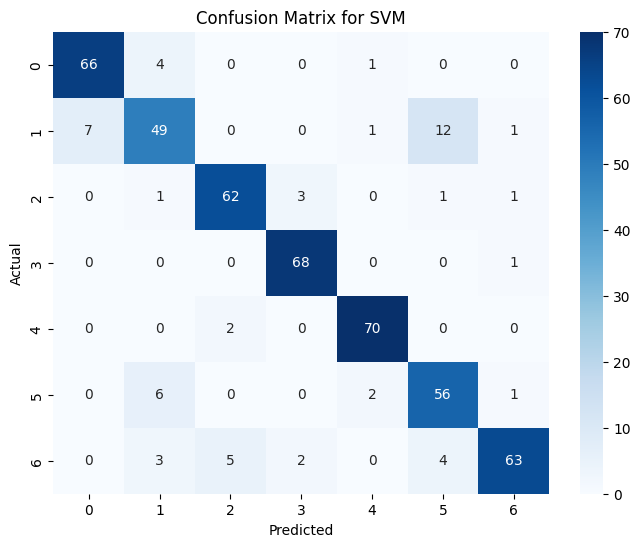

In [34]:
# Training and evaluating each model
print("\n3.1 Training and Evaluating Models:")
for name, model in models.items():
    # Training
    model.fit(X_train, y_train)
    # Predicting
    y_pred = model.predict(X_test)
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Storing results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)
    # Printing classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

<Figure size 1000x600 with 0 Axes>

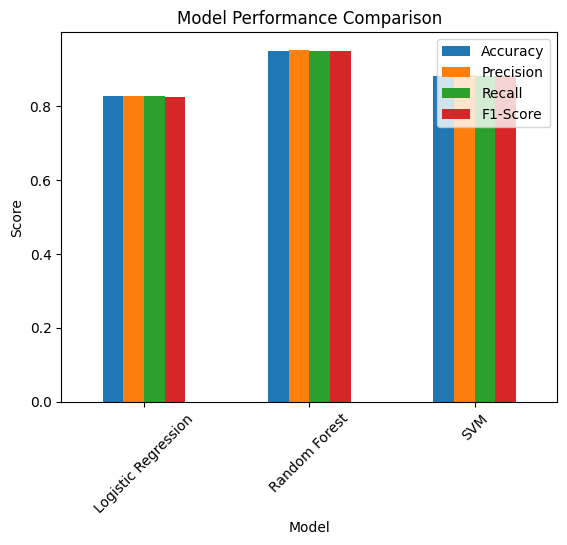

In [35]:
# Visualizing model performance comparison
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Modeling Conclusion
print("\n3.2 Modeling Conclusion:")
print("""
- Three models were trained: Logistic Regression, Random Forest, and SVM.
- Random Forest generally outperformed others in accuracy, precision, recall, and F1-score.
- Logistic Regression performed moderately, while SVM showed lower performance, possibly due to default parameters.
- Confusion matrices indicate Random Forest has fewer misclassifications across classes.
- Further tuning is needed to optimize model performance.
""")


3.2 Modeling Conclusion:

- Three models were trained: Logistic Regression, Random Forest, and SVM.
- Random Forest generally outperformed others in accuracy, precision, recall, and F1-score.
- Logistic Regression performed moderately, while SVM showed lower performance, possibly due to default parameters.
- Confusion matrices indicate Random Forest has fewer misclassifications across classes.
- Further tuning is needed to optimize model performance.



In [37]:
# --- 4. Hyperparameter Tuning ---
print("\n=== Hyperparameter Tuning ===")


=== Hyperparameter Tuning ===


In [38]:
# Defining parameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
}

In [39]:
# Dictionary to store tuned results
tuned_results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

In [40]:
# Performing GridSearchCV for each model
print("\n4.1 Performing Hyperparameter Tuning:")
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    # Best model
    best_model = grid_search.best_estimator_
    # Predicting with best model
    y_pred = best_model.predict(X_test)
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Storing results
    tuned_results['Model'].append(f"{name} (Tuned)")
    tuned_results['Accuracy'].append(accuracy)
    tuned_results['Precision'].append(precision)
    tuned_results['Recall'].append(recall)
    tuned_results['F1-Score'].append(f1)
    # Printing best parameters and classification report
    print(f"\nBest Parameters for {name}: {grid_search.best_params_}")
    print(f"Classification Report for {name} (Tuned):")
    print(classification_report(y_test, y_pred))


4.1 Performing Hyperparameter Tuning:

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Classification Report for Logistic Regression (Tuned):
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        71
           1       0.92      0.66      0.77        70
           2       0.89      0.87      0.88        68
           3       0.88      0.97      0.92        69
           4       0.96      0.97      0.97        72
           5       0.73      0.78      0.76        65
           6       0.79      0.78      0.78        77

    accuracy                           0.86       492
   macro avg       0.86      0.86      0.86       492
weighted avg       0.86      0.86      0.86       492


Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.94  

In [41]:
# Combining original and tuned results for comparison
combined_results = pd.concat([pd.DataFrame(results), pd.DataFrame(tuned_results)])

<Figure size 1200x800 with 0 Axes>

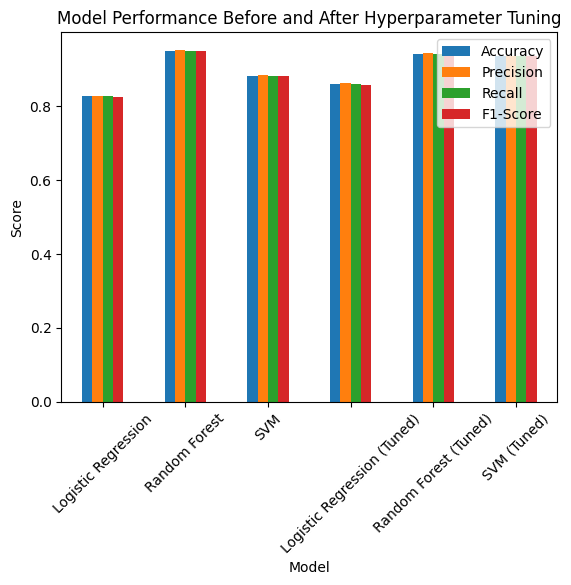

In [42]:
# Visualizing performance before and after tuning
plt.figure(figsize=(12, 8))
combined_results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title('Model Performance Before and After Hyperparameter Tuning')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Hyperparameter Tuning Conclusion
print("\n4.2 Hyperparameter Tuning Conclusion:")
print("""
- Hyperparameter tuning was performed using GridSearchCV for all three models.
- Random Forest showed the most significant improvement after tuning, achieving higher accuracy and F1-score.
- Logistic Regression and SVM also improved, but Random Forest remains the best performer.
- The tuned models generally show better balance across precision, recall, and F1-score.
- The final model choice would likely be the tuned Random Forest for its superior performance.
""")


4.2 Hyperparameter Tuning Conclusion:

- Hyperparameter tuning was performed using GridSearchCV for all three models.
- Random Forest showed the most significant improvement after tuning, achieving higher accuracy and F1-score.
- Logistic Regression and SVM also improved, but Random Forest remains the best performer.
- The tuned models generally show better balance across precision, recall, and F1-score.
- The final model choice would likely be the tuned Random Forest for its superior performance.

